# Optical Character Recognition

Klasa OCR została zaimplementowana w pliku *OCR.py*. W tym notebooku jej zaprezentowano i omówiono jej działanie.

In [1]:
import numpy as np
import cv2
from OCR import OCR
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

Przygotowny program działa przy założeniu, że na obrazie znajduje się konkretna czcionka jednej wielkości.

Klasa OCR może przyjmować w konstruktorze rodzaj czcionki, średnią wysokość linii oraz współczynnik odpowiadający za to, jak duże spacje występują w tekście. Wewnątrz klasy konstruwany jest słownik wzorców znaków na podstawie folderu danej czcionki, a także ustalana jest kolejność przetwarzania liter. Jest to ważny krok, gdyż niektóre litery zawierają się w innych literach, np. $c\subset e$. Litery, powinny być przetwarzane zgodnie z porządkiem wyznaczanym przez relację inkluzji tak, aby te zawierające się w innych literach były zostawione na koniec.

Tak przygotowany OCR dla danej czcionki można wywołać na zadanym obrazie funkcją *ocr.image_to_text(path)*. Obraz jest rzutowany na jeden kanał przy pomocy biblioteki PIL, a następnie odwracane są jego kolory tak, aby sygnał znaku miał dużą wartość numeryczną, a tło małą. Następnie do obrazu tymczasowo doklejany jest obraz zawierający wzorce wszystkich znaków alfabetu. Krok ten jest potrzabny ponieważ rozpoznanie danej litery to odcięcie pików korelacji, czyli miejsc, gdzie ta korelacja jest największa. Jeśli na obrazie nie było pewnego znaku, algorytm dopasowałby inny znak o największym podobieństwie. Następnie na obrazie wyszukiwane są kolejne wzorce znaków w kolejności ustalonej w konstruktorze, ich położenia zapamiętywane są w liśćie krotek, a z obrazu sam wzorzec jest usuwany, co widać na poniższym obrazie. 

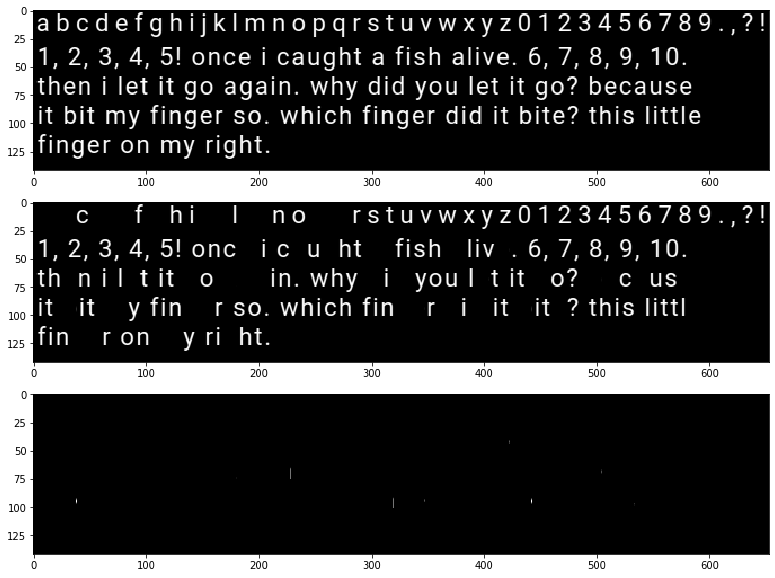

In [2]:
ocr = OCR('sans-serif', line_height=26.7, space_coefficient=0.6)
ocr.image_to_text('sans-serif-image.png')
image = ocr.get_image_states()
fig, axs = plt.subplots(3, 1, figsize=(20, 10))
axs[0].imshow(image[0], cmap='gray')
axs[1].imshow(image[10], cmap='gray')
axs[2].imshow(image[-1], cmap='gray')

Na koniec na obrazie pozostają jedynie drobne fragmenty znaków. Wyszukiwanie wzorca jest przeprowadzane tak jak w notebooku *Zastosowania DFT*, a więc korelacja wzorca z obrazem liczona jest przy pomocy transformacji Fouriera, a następnie z obrazu wybierane są punkty, dla których $korelacja_{ij}\geq s\cdot korelacja_{max}$. Współczynniki $s$ są różne dla różnych znaków oraz trybów działania aplikacji. Z wyszukanych lokalizacji pików korelacji budowany jest zbiór. Współrzędna $y$ dzielona jest przez średnią wysokość linii, co w większości przypadków dobrze dzieli tekst na linie. Ponieważ dane przechowywane są w zbiorze, usuwane są duplikaty. Następnie ze zbioru tworzona jest lista, która sortowana jest po obu współrzędnych. Finalnie lista przetwarzana jest na tekst. Jeśli w linii występują znaki w odległości mniejszej niż średnia szerokość znaku do tekstu dopisywany jest tylko jeden z nich. Założono, że jeśli taka sytuacja ma miejsce, to jest to zwykle ten sam znak. Jeśli odległość w osi $OX$ między znakami jest wystarczająco duża, co wyznacza podawany w konstruktorze *space_coefficient*, to do tekstu dodawana jest spacja. 

Współczynniki $s$ dobierano dla pierwszych 2 tekstów, następnie sprawdzano, czy generalizują się one na trzeci, dłuższy tekst. Otrzymany tekst był porównywany z podanym przy użyciu odległości edycyjnej.

In [3]:
text1 = '''1, 2, 3, 4, 5! once i caught a fish alive. 6, 7, 8, 9, 10.
then i let it go again. why did you let it go? because
it bit my finger so. which finger did it bite? this little
finger on my right.'''

text2 = '''0, 2, 4, 6, 8 being even is just great. 1, 3, 5, 7, 9 being
odd is just fine.'''

text3 = '''number poem down you run and 1 is done. around,
and down, and out go you, thats the way to make a 2.
around, and around, just like a bee, thats the way to
make a 3. down, across, and down once more, thats
the way to make a 1. short neck, belly fat, number 5
wears a hat. down, around, in a circle you go, thats a
six, just as you know. straight across, slide down
from heaven, thats the way to make a 7. first a
snake, then come back straight, thats the way to
make an 8. first a ball and then a line, thats the way
to make a 9. tall straight, circle then, thats the way
to make a 10'''

## Nienaruszony obraz

### Czcionka sans-serif

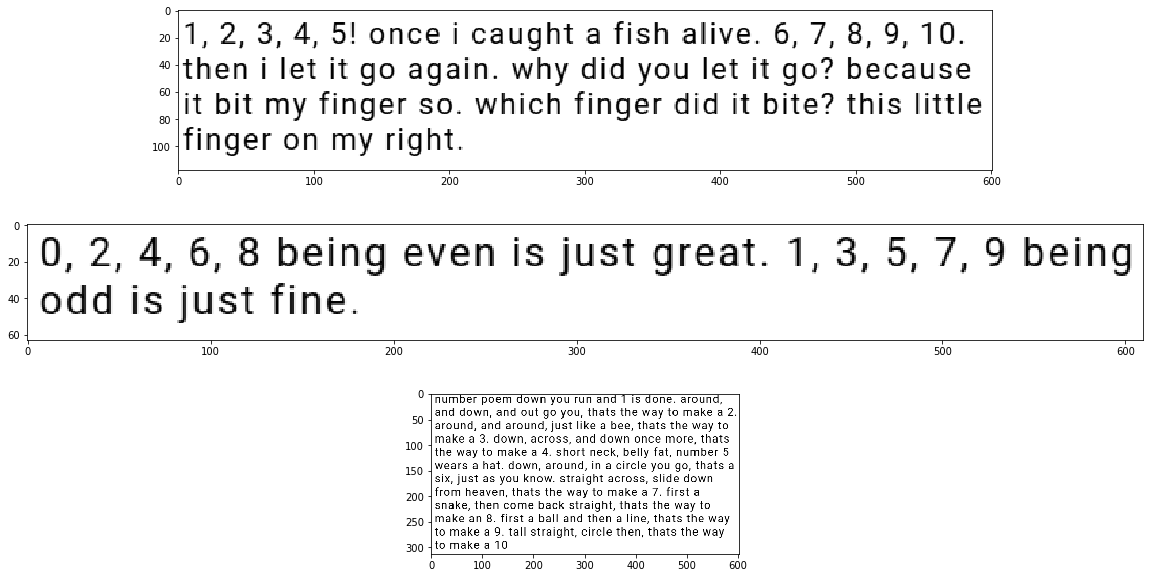

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10))
axs[0].imshow(np.array(Image.open('sans-serif-image.png').convert('L')), cmap='gray')
axs[1].imshow(np.array(Image.open('sans-serif-image2.png').convert('L')), cmap='gray')
axs[2].imshow(np.array(Image.open('sans-serif-image3.png').convert('L')), cmap='gray')

In [5]:
ocr = OCR('sans-serif', line_height=26.7, space_coefficient=0.6)
string = ocr.image_to_text('sans-serif-image.png')
print(string)

1, 2, 3, 4, 5! once i caught a fish alive. 6, 7, 8, 9, 10.
then i let it go again. why did you let it go? because
it bit my finger so. which finger did it bite? this little
finger on my right.


In [6]:
ocr.show_statistics(text1)

a occurred in text 6 times; found 6 in image
b occurred in text 3 times; found 3 in image
d occurred in text 4 times; found 4 in image
m occurred in text 2 times; found 2 in image
g occurred in text 8 times; found 8 in image
q occurred in text 0 times; found 0 in image
p occurred in text 0 times; found 0 in image
e occurred in text 12 times; found 12 in image
j occurred in text 0 times; found 0 in image
k occurred in text 0 times; found 0 in image
f occurred in text 4 times; found 4 in image
h occurred in text 8 times; found 8 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 7 times; found 7 in image
o occurred in text 6 times; found 6 in image
c occurred in text 4 times; found 4 in image
s occurred in text 4 times; found 4 in image
u occurred in text 3 times; found 3 in image
y occurred in text 4 times; found 4 in image
w occurred in text 2 times; found 2 in image
v occurred in text 1 times; found 1 in image
x occurred in text 0 times; found 0 in image
z occurr

In [7]:
string = ocr.image_to_text('sans-serif-image2.png')
print(string)

0, 2, 4, 6, 8 being even is just great. 1, 3, 5, 7, 9 being
odd is just fine.


In [8]:
ocr.show_statistics(text2)

a occurred in text 1 times; found 1 in image
b occurred in text 2 times; found 2 in image
d occurred in text 2 times; found 2 in image
m occurred in text 0 times; found 0 in image
g occurred in text 3 times; found 3 in image
q occurred in text 0 times; found 0 in image
p occurred in text 0 times; found 0 in image
e occurred in text 6 times; found 6 in image
j occurred in text 2 times; found 2 in image
k occurred in text 0 times; found 0 in image
f occurred in text 1 times; found 1 in image
h occurred in text 0 times; found 0 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 4 times; found 4 in image
o occurred in text 1 times; found 1 in image
c occurred in text 0 times; found 0 in image
s occurred in text 4 times; found 4 in image
u occurred in text 2 times; found 2 in image
y occurred in text 0 times; found 0 in image
w occurred in text 0 times; found 0 in image
v occurred in text 1 times; found 1 in image
x occurred in text 0 times; found 0 in image
z occurred

In [9]:
string = ocr.image_to_text('sans-serif-image3.png')
print(string)

number poem down you run and 1 is done. around,
and down, and out go you, thats the way to make a 2.
around, and around, just like a bee, thats the way to
make a 3. down, across, and down once more, thats
the way to make a 1. short neck, belly fat, number 5
wears a hat. down, around, in a circle you go, thats a
six, just as you know. straight across, slide down
from heaven, thats the way to make a 7. first a
snake, then come back straight, thats the way to
make an 8. first a ball and then a line, thats the way
to make a 9. tall straight, circle then, thats the way
to make a 10


In [10]:
ocr.show_statistics(text3)

a occurred in text 60 times; found 60 in image
b occurred in text 6 times; found 6 in image
d occurred in text 18 times; found 18 in image
m occurred in text 13 times; found 13 in image
g occurred in text 5 times; found 5 in image
q occurred in text 0 times; found 0 in image
p occurred in text 1 times; found 1 in image
e occurred in text 37 times; found 37 in image
j occurred in text 2 times; found 2 in image
k occurred in text 12 times; found 12 in image
f occurred in text 4 times; found 4 in image
h occurred in text 24 times; found 24 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 31 times; found 31 in image
o occurred in text 34 times; found 34 in image
c occurred in text 10 times; found 10 in image
s occurred in text 26 times; found 26 in image
u occurred in text 14 times; found 14 in image
y occurred in text 12 times; found 12 in image
w occurred in text 15 times; found 15 in image
v occurred in text 1 times; found 1 in image
x occurred in text 1 times; f

Współczynniki dobrane dla czcionki *sans_serif* dobrze generalizują się na inne zdjęcia.

### Czcionka serif

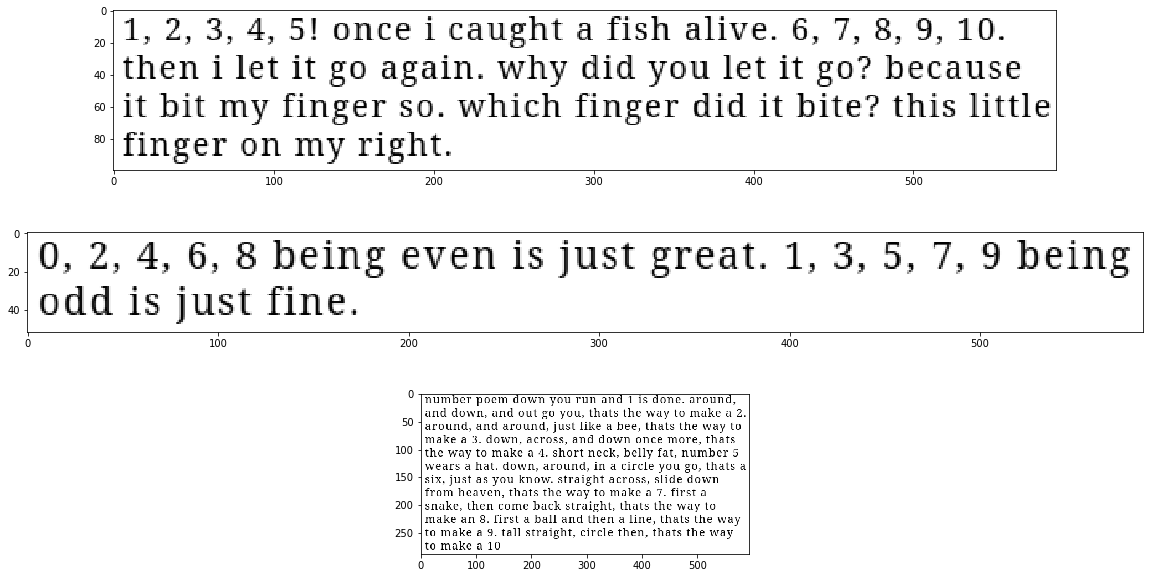

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10))
axs[0].imshow(np.array(Image.open('serif-image.png').convert('L')), cmap='gray')
axs[1].imshow(np.array(Image.open('serif-image2.png').convert('L')), cmap='gray')
axs[2].imshow(np.array(Image.open('serif-image3.png').convert('L')), cmap='gray')

In [12]:
ocr = OCR('serif', space_coefficient=0.5, line_height=25)
string = ocr.image_to_text('serif-image.png')
print(string)

1, 2, 3, 4, 5! once i caught a fish alive. 6, 7, 8, 9, 10.
then i let it go again. why did you let it go? because
it bit my finger so. which finger did it bite? this little
finger on my right.


In [13]:
ocr.show_statistics(text1)

a occurred in text 6 times; found 6 in image
b occurred in text 3 times; found 3 in image
d occurred in text 4 times; found 4 in image
m occurred in text 2 times; found 2 in image
g occurred in text 8 times; found 8 in image
q occurred in text 0 times; found 0 in image
p occurred in text 0 times; found 0 in image
e occurred in text 12 times; found 12 in image
j occurred in text 0 times; found 0 in image
k occurred in text 0 times; found 0 in image
f occurred in text 4 times; found 4 in image
h occurred in text 8 times; found 8 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 7 times; found 7 in image
o occurred in text 6 times; found 6 in image
c occurred in text 4 times; found 4 in image
s occurred in text 4 times; found 4 in image
u occurred in text 3 times; found 3 in image
y occurred in text 4 times; found 4 in image
w occurred in text 2 times; found 2 in image
v occurred in text 1 times; found 1 in image
x occurred in text 0 times; found 0 in image
z occurr

In [14]:
string = ocr.image_to_text('serif-image2.png')
print(string)

0, 2, 4, 6, 8 being even is just great. 1, 3, 5, 7, 9 being
odd is just fine.


In [15]:
ocr.show_statistics(text2)

a occurred in text 1 times; found 1 in image
b occurred in text 2 times; found 2 in image
d occurred in text 2 times; found 2 in image
m occurred in text 0 times; found 0 in image
g occurred in text 3 times; found 3 in image
q occurred in text 0 times; found 0 in image
p occurred in text 0 times; found 0 in image
e occurred in text 6 times; found 6 in image
j occurred in text 2 times; found 2 in image
k occurred in text 0 times; found 0 in image
f occurred in text 1 times; found 1 in image
h occurred in text 0 times; found 0 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 4 times; found 4 in image
o occurred in text 1 times; found 1 in image
c occurred in text 0 times; found 0 in image
s occurred in text 4 times; found 4 in image
u occurred in text 2 times; found 2 in image
y occurred in text 0 times; found 0 in image
w occurred in text 0 times; found 0 in image
v occurred in text 1 times; found 1 in image
x occurred in text 0 times; found 0 in image
z occurred

In [16]:
string = ocr.image_to_text('serif-image3.png')
print(string)

number poem down you run and 1 is done. around,
and down, and out go you, thats the way to make a 2.
around, and around, just like a bee, thats the way to
make a 3. down, across, and down once more, thats
the way to make a 4. short neck, belly fat, number 5
wears a hat. down, around, in a circle you go, thats a
six, just as you know. straight across, slide down
from heaven, thats the way to make a 7. first a
snake, then come back straight, thats the way to
make an 8. first a ball and then a line, thats the way
to make a 9,,tall straight, circle then, thats the way
to make a i,,


In [17]:
ocr.show_statistics(text3)

a occurred in text 60 times; found 60 in image
b occurred in text 6 times; found 6 in image
d occurred in text 18 times; found 18 in image
m occurred in text 13 times; found 13 in image
g occurred in text 5 times; found 5 in image
q occurred in text 0 times; found 0 in image
p occurred in text 1 times; found 1 in image
e occurred in text 37 times; found 37 in image
j occurred in text 2 times; found 2 in image
k occurred in text 12 times; found 12 in image
f occurred in text 4 times; found 4 in image
h occurred in text 24 times; found 24 in image
0 occurred in text 1 times; found 0 in image
n occurred in text 31 times; found 31 in image
o occurred in text 34 times; found 34 in image
c occurred in text 10 times; found 10 in image
s occurred in text 26 times; found 26 in image
u occurred in text 14 times; found 14 in image
y occurred in text 12 times; found 12 in image
w occurred in text 15 times; found 15 in image
v occurred in text 1 times; found 1 in image
x occurred in text 1 times; f

Dla czcionki szeryfowej OCR radzi sobie trochę gorzej z generalizacją współczynników niż dla czcionki bezszeryfowej, jednak poprawność na poziomie $99\%$ jest całkiem dobrym wynikiem.

## Obraz obrócony

In [18]:
def save_rotated(path):
    img = Image.open(path).rotate(-15, expand=1.5, resample = Image.BICUBIC, fillcolor=(255, 255, 255))
    result = Image.new('RGB', (int(1.2*img.width), int(1.2*img.height)), (255, 255, 255))
    result.paste(img, (int(0.1*img.width), int(0.1*img.height)))
    result.save(f'{path[:-4]}-rotated.png')

In [19]:
save_rotated('sans-serif-image.png')
save_rotated('sans-serif-image2.png')
save_rotated('sans-serif-image3.png')
save_rotated('serif-image.png')
save_rotated('serif-image2.png')
save_rotated('serif-image3.png')

Na potrzeby tej części zadania wygenerowano obrócone obrazy. Niestety, operacja ta delikatnie zmienia obraz, dlatego dla obracanego obrazu dobrano nowe współczynniki. Ponownie dobierano je tylko do pierwszych dwóch tekstów i sprawdzano, czy generalizują się na tekście trzecim. Do odtworzenia kątu obrotu i obrócenia obrazu w trakcie wykorzystano bibliotekę OpenCV. Najpierw lokalizowany jest najmniejszy prostokąt zawierający cały tekst i odczytywany jest kąt pod jakim ten prostokąt jest obrócony w stosunku do obrazu. Następnie obraz jest odwracany w przeciwnym kierunku, a jego marginesy odpowiednio przycinane.  

### Czcionka sans-serif

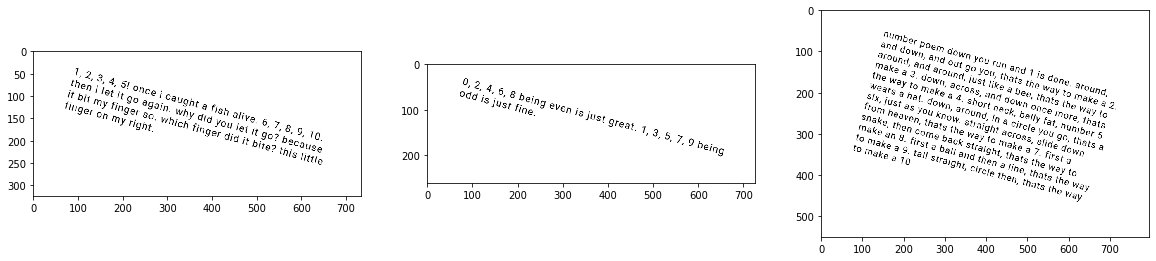

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(np.array(Image.open('sans-serif-image-rotated.png').convert('L')), cmap='gray')
axs[1].imshow(np.array(Image.open('sans-serif-image2-rotated.png').convert('L')), cmap='gray')
axs[2].imshow(np.array(Image.open('sans-serif-image3-rotated.png').convert('L')), cmap='gray')

In [21]:
ocr = OCR('sans-serif', line_height=26.7, space_coefficient=0.6)
string = ocr.image_to_text('sans-serif-image-rotated.png', rotated=True)
print(string)

1, 2, 3, 4, 5! once i caught a fish alive. 6, 7, 8, 9, 10.
then i let it go again. why did you let it go? because
it bit my finger so. which finger did it bite? this little
finger on my right.


In [22]:
ocr.show_statistics(text1)

a occurred in text 6 times; found 6 in image
b occurred in text 3 times; found 3 in image
d occurred in text 4 times; found 4 in image
m occurred in text 2 times; found 2 in image
g occurred in text 8 times; found 8 in image
q occurred in text 0 times; found 0 in image
p occurred in text 0 times; found 0 in image
e occurred in text 12 times; found 12 in image
j occurred in text 0 times; found 0 in image
k occurred in text 0 times; found 0 in image
f occurred in text 4 times; found 4 in image
h occurred in text 8 times; found 8 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 7 times; found 7 in image
o occurred in text 6 times; found 6 in image
c occurred in text 4 times; found 4 in image
s occurred in text 4 times; found 4 in image
u occurred in text 3 times; found 3 in image
y occurred in text 4 times; found 4 in image
w occurred in text 2 times; found 2 in image
v occurred in text 1 times; found 1 in image
x occurred in text 0 times; found 0 in image
z occurr

In [23]:
string = ocr.image_to_text('sans-serif-image2-rotated.png', rotated=True)
print(string)

0, 2, 4, 6, 8 being even is just great. 1, 3, 5, 7, 9 being
odd is just fine.


In [24]:
ocr.show_statistics(text2)

a occurred in text 1 times; found 1 in image
b occurred in text 2 times; found 2 in image
d occurred in text 2 times; found 2 in image
m occurred in text 0 times; found 0 in image
g occurred in text 3 times; found 3 in image
q occurred in text 0 times; found 0 in image
p occurred in text 0 times; found 0 in image
e occurred in text 6 times; found 6 in image
j occurred in text 2 times; found 2 in image
k occurred in text 0 times; found 0 in image
f occurred in text 1 times; found 1 in image
h occurred in text 0 times; found 0 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 4 times; found 4 in image
o occurred in text 1 times; found 1 in image
c occurred in text 0 times; found 0 in image
s occurred in text 4 times; found 4 in image
u occurred in text 2 times; found 2 in image
y occurred in text 0 times; found 0 in image
w occurred in text 0 times; found 0 in image
v occurred in text 1 times; found 1 in image
x occurred in text 0 times; found 0 in image
z occurred

In [25]:
string = ocr.image_to_text('sans-serif-image3-rotated.png', rotated=True)
print(string)

number poem down you run and 1 is done. arcund,
and down, and cut go ycu, thats the way to make a 2.
arcund, and arcund, just like a bee, thats the way to
make a 3. dcwn, across, and dcwn once more, thats
the way to make a 4. short neck, belly fat, number 5
wears a hat. down, around, in a circle you go, thats a
six, just as you know. straight acrcss, slide dcwn
from heaven, thats the way to make a 7. first a
snake, then ccme backstraigm, thats the way to
make an 8. first a ball and then a line, thats the way
to make a 9. tall straight, circle then, thats the way
to make a 10


In [26]:
ocr.show_statistics(text3)

a occurred in text 60 times; found 60 in image
b occurred in text 6 times; found 6 in image
d occurred in text 18 times; found 18 in image
m occurred in text 13 times; found 14 in image
g occurred in text 5 times; found 5 in image
q occurred in text 0 times; found 0 in image
p occurred in text 1 times; found 1 in image
e occurred in text 37 times; found 37 in image
j occurred in text 2 times; found 2 in image
k occurred in text 12 times; found 12 in image
f occurred in text 4 times; found 4 in image
h occurred in text 24 times; found 23 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 31 times; found 31 in image
o occurred in text 34 times; found 24 in image
c occurred in text 10 times; found 20 in image
s occurred in text 26 times; found 26 in image
u occurred in text 14 times; found 14 in image
y occurred in text 12 times; found 12 in image
w occurred in text 15 times; found 15 in image
v occurred in text 1 times; found 1 in image
x occurred in text 1 times; f

Współczynniki generalizują się dosyć dobrze, chociaż nie idealnie.

### Czcionka serif

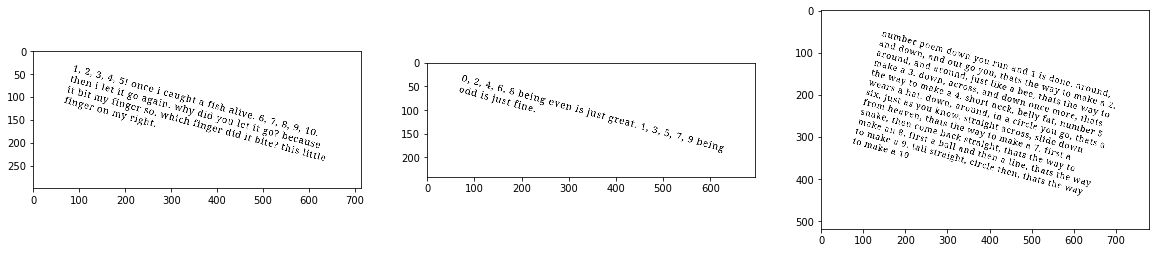

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(np.array(Image.open('serif-image-rotated.png').convert('L')), cmap='gray')
axs[1].imshow(np.array(Image.open('serif-image2-rotated.png').convert('L')), cmap='gray')
axs[2].imshow(np.array(Image.open('serif-image3-rotated.png').convert('L')), cmap='gray')

In [28]:
ocr = OCR('serif', line_height=25.6, space_coefficient=0.5)
string = ocr.image_to_text('serif-image-rotated.png', rotated=True)
print(string)

1, 2, 3, 4, 5! once i caught a fish alive. 6, 7, 8, 9, 10.
then i let it go again. why did you let it go? because
it bit my finger so. which finger did it bite? this little
finger on my right.


In [29]:
ocr.show_statistics(text1)

a occurred in text 6 times; found 6 in image
b occurred in text 3 times; found 3 in image
d occurred in text 4 times; found 4 in image
m occurred in text 2 times; found 2 in image
g occurred in text 8 times; found 8 in image
q occurred in text 0 times; found 0 in image
p occurred in text 0 times; found 0 in image
e occurred in text 12 times; found 12 in image
j occurred in text 0 times; found 0 in image
k occurred in text 0 times; found 0 in image
f occurred in text 4 times; found 4 in image
h occurred in text 8 times; found 8 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 7 times; found 7 in image
o occurred in text 6 times; found 6 in image
c occurred in text 4 times; found 4 in image
s occurred in text 4 times; found 4 in image
u occurred in text 3 times; found 3 in image
y occurred in text 4 times; found 4 in image
w occurred in text 2 times; found 2 in image
v occurred in text 1 times; found 1 in image
x occurred in text 0 times; found 0 in image
z occurr

In [30]:
string = ocr.image_to_text('serif-image2-rotated.png', rotated=True)
print(string)

0, 2, 4, 6, 8 being even is just great. 1, 3, 5, 7, 9 being
odd is just fine.


In [31]:
ocr.show_statistics(text2)

a occurred in text 1 times; found 1 in image
b occurred in text 2 times; found 2 in image
d occurred in text 2 times; found 2 in image
m occurred in text 0 times; found 0 in image
g occurred in text 3 times; found 3 in image
q occurred in text 0 times; found 0 in image
p occurred in text 0 times; found 0 in image
e occurred in text 6 times; found 6 in image
j occurred in text 2 times; found 2 in image
k occurred in text 0 times; found 0 in image
f occurred in text 1 times; found 1 in image
h occurred in text 0 times; found 0 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 4 times; found 4 in image
o occurred in text 1 times; found 1 in image
c occurred in text 0 times; found 0 in image
s occurred in text 4 times; found 4 in image
u occurred in text 2 times; found 2 in image
y occurred in text 0 times; found 0 in image
w occurred in text 0 times; found 0 in image
v occurred in text 1 times; found 1 in image
x occurred in text 0 times; found 0 in image
z occurred

In [32]:
string = ocr.image_to_text('serif-image3-rotated.png', rotated=True)
print(string)

n,,mher poem down you run and 1 is done. around.
and dcwn, and o,,t go you, thats the wav to make a 2.
around, and around, just like a bee, thats the way to
make a 3. down. across, ard down once more. thats
tne way to make a 4. short neck, hellv tat, numbe,. 5
wears a hat. dowr, around. in a ci,.cle you go, thats a
si,,, just as you know. straight across, slide down
from heaven, tnats the way to make a 7. first a
srake, tnen c,.me back straight, thats the ,way to
make an 8. fi, st a b ,ll and then a line, th.,ts the way
tc make a 9. tall str.,ight, circle then, tnats the way
to make a !0


In [33]:
ocr.show_statistics(text3)

a occurred in text 60 times; found 57 in image
b occurred in text 6 times; found 4 in image
d occurred in text 18 times; found 18 in image
m occurred in text 13 times; found 13 in image
g occurred in text 5 times; found 5 in image
q occurred in text 0 times; found 0 in image
p occurred in text 1 times; found 1 in image
e occurred in text 37 times; found 37 in image
j occurred in text 2 times; found 2 in image
k occurred in text 12 times; found 12 in image
f occurred in text 4 times; found 3 in image
h occurred in text 24 times; found 22 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 31 times; found 32 in image
o occurred in text 34 times; found 31 in image
c occurred in text 10 times; found 12 in image
s occurred in text 26 times; found 26 in image
u occurred in text 14 times; found 12 in image
y occurred in text 12 times; found 10 in image
w occurred in text 15 times; found 15 in image
v occurred in text 1 times; found 3 in image
x occurred in text 1 times; f

Dla czcionki szeryfowej współczynniki generalizują się trochę gorzej niż dla bezszeryfowej.

Obracanie obrazu lekko zmienia piksele obrazu, dlatego wzorzec nie jest tak dokładny. Im większy kąt obrotu tym sytuacja staje się trudniejsza i wymaga obniżania współczynników. Nie są one też tak uniwersalne, jak dla nienaruszonego obrazu.

## Obraz z szumem

Zastosowano usuwanie szumu poprzez transformację do dziedziny częstotliwości i obcięcie wysokich częstotliwości. Ponieważ jakość obrazu trochę się pogorszyła, zastosowano współczynniki dobrane do obracanego obrazu.

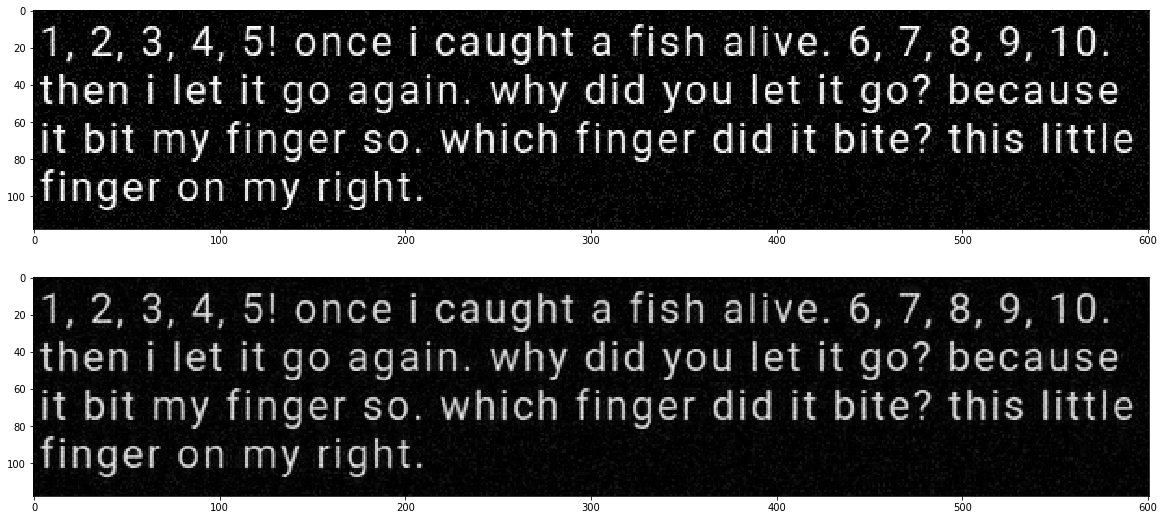

In [34]:
fig, axs = plt.subplots(2, 1, figsize=(20, 9))
axs[0].imshow(np.array(ImageOps.invert(Image.open('sans-serif-image-noise.png').convert('L'))), cmap='gray')
axs[1].imshow(ocr.delete_noise(np.array(ImageOps.invert(Image.open('sans-serif-image-noise.png').convert('L'))), fraction=0.4), cmap='gray')

In [36]:
ocr = OCR('sans-serif', line_height=26.7, space_coefficient=0.6)
string = ocr.image_to_text('sans-serif-image-noise.png', noise=0.4)
print(string)

1, 2, 3, 4, 5! once i caught a fish alive. 6, 7, 8, 9, l0.
then i let it go again. why did you let it gc? because
it bit nny finger so. which fmger did it bite? this little
finger on my right.


In [37]:
ocr.show_statistics(text1)

a occurred in text 6 times; found 6 in image
b occurred in text 3 times; found 3 in image
d occurred in text 4 times; found 4 in image
m occurred in text 2 times; found 2 in image
g occurred in text 8 times; found 8 in image
q occurred in text 0 times; found 0 in image
p occurred in text 0 times; found 0 in image
e occurred in text 12 times; found 12 in image
j occurred in text 0 times; found 0 in image
k occurred in text 0 times; found 0 in image
f occurred in text 4 times; found 4 in image
h occurred in text 8 times; found 8 in image
0 occurred in text 1 times; found 1 in image
n occurred in text 7 times; found 8 in image
o occurred in text 6 times; found 5 in image
c occurred in text 4 times; found 5 in image
s occurred in text 4 times; found 4 in image
u occurred in text 3 times; found 3 in image
y occurred in text 4 times; found 4 in image
w occurred in text 2 times; found 2 in image
v occurred in text 1 times; found 1 in image
x occurred in text 0 times; found 0 in image
z occurr

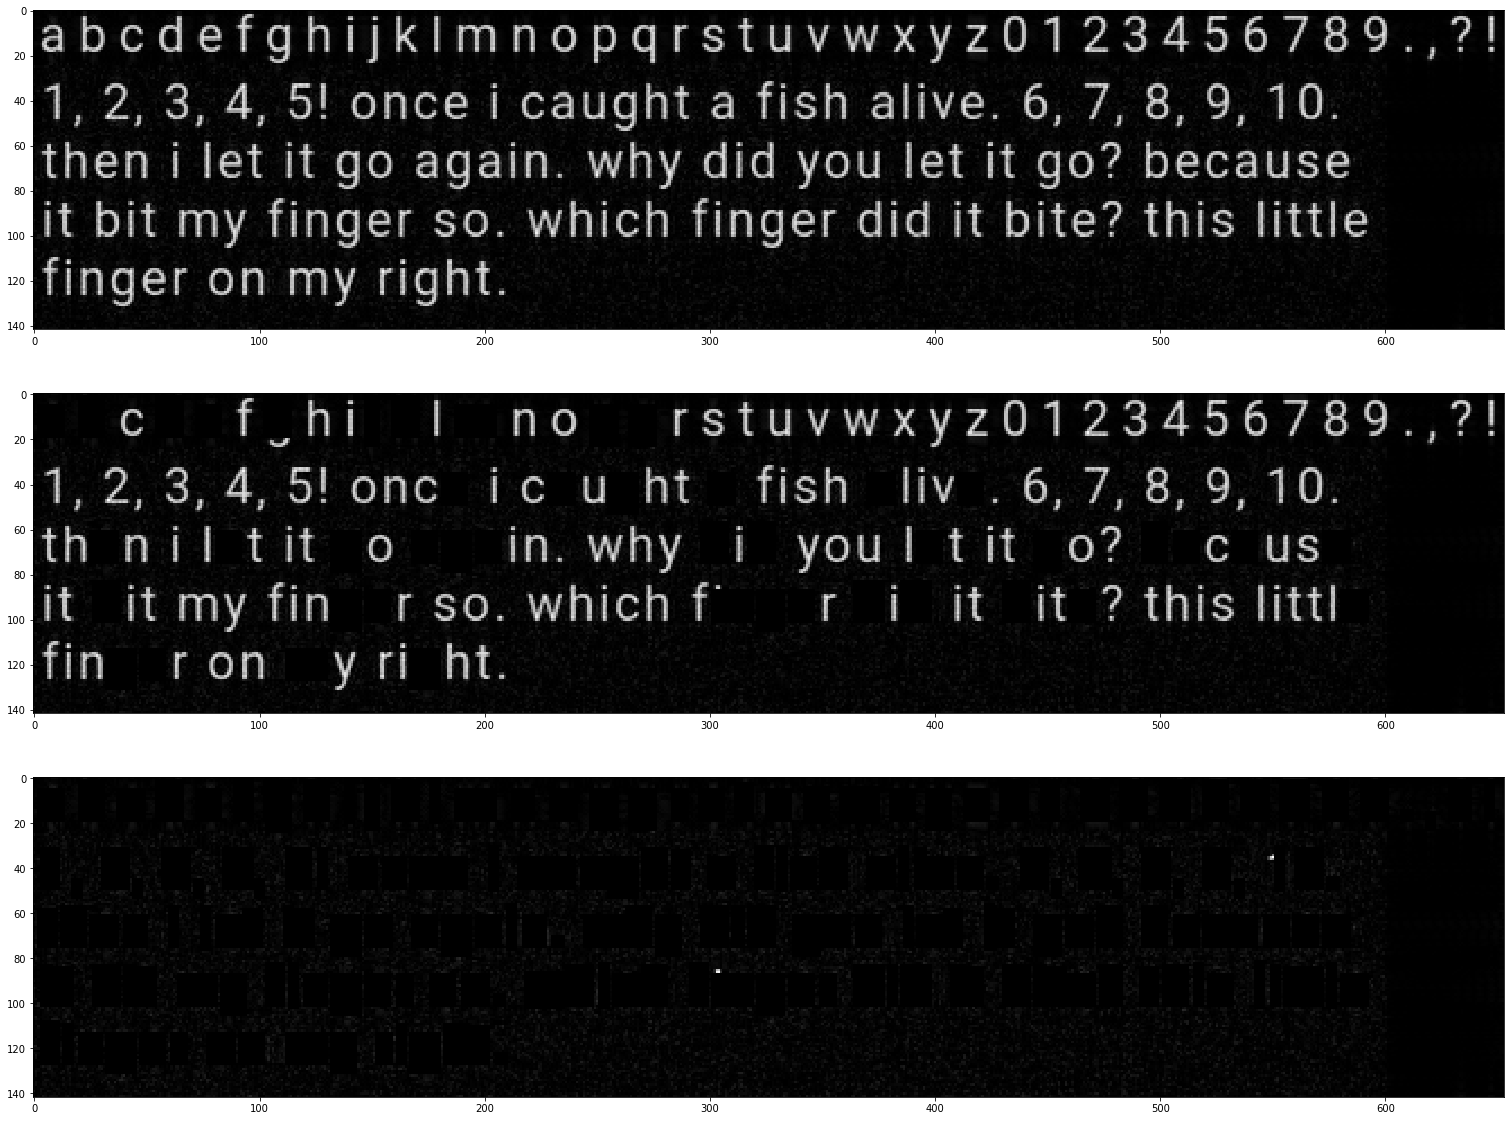

In [38]:
image = ocr.get_image_states()
fig, axs = plt.subplots(3, 1, figsize=(30, 20))
axs[0].imshow(image[0], cmap='gray')
axs[1].imshow(image[10], cmap='gray')
axs[2].imshow(image[-1], cmap='gray')

## Wnioski

Transformacja Fouriera może być zastosowana do zadań OCR, jednak wymaga to żmudnego dobierania odpowiednich współczynników dla czcionek i różnych poziomów jakości obrazu. Skonstruwany OCR lepiej radzi sobie z prostą czcionka bezszeryfową.